# Machine Learning FTE - 35306


Professor: Ricardo Torres -- ricardo.dasilvatorres@wur.nl

Chapter 05 - Sampling Methods - Exercise 8


In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneOut

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm 


import seaborn as sns

from IPython.display import display

%matplotlib inline

## 8. We will now perform cross-validation on a simulated data set

(a) Generate a simulated data set as follows:

`> set.seed(1)`

`> x=rnorm(100)` 

`> y=x-2*x^2+rnorm (100)`

In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.

0.09397753624715274

In [37]:
np.random.seed(1)

x = np.random.normal(loc = 0, scale = 1, size=100)
y = x-2*x**2 + np.random.normal(loc = 0, scale = 1, size = 100)

(b) Create a scatterplot of $X$ against $Y$. Comment on what you find.

<Axes: >

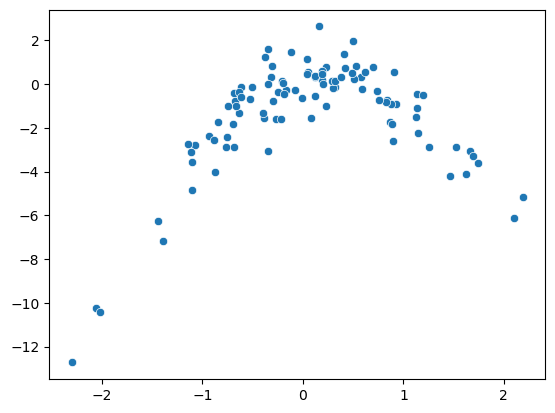

In [45]:
sns.scatterplot(x=x, y=y)

(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:

i. $Y = \beta_0 + \beta_1X + \epsilon$

ii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$

iii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

iv. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$.

Note you may find it helpful to create a single data set containing both $X$ and $Y$.


In [51]:
df = pd.DataFrame({"X" : x, "Y" : y})

In [68]:
def degree_inc(n_degree):
    formula = "Y ~ " + "+".join(["np.power(X, "+ str(x) + ")"for x in range(1, n_degree + 1, 1)])
    return formula

In [90]:
degrees = 1
n_splits = len(df.index)
data=df

In [265]:
def LOOCV(data, n_splits, formula):    
    np.random.seed(np.random.randint(100000))
    results = []
    for train, test in KFold(n_splits = n_splits).split(data):
        train, test = sm.add_constant(data.iloc[train]), sm.add_constant(data.iloc[test])
        lm = sm.formula.ols(formula, train).fit()
        y_hat = lm.predict(test.X)
        #mse = (np.square(y_hat.values - test.Y.values)).tolist()
        mse = mean_squared_error(test.Y, y_hat)
        results.append(mse)
        
    return np.mean(results)

In [269]:
def simulate_degrees(data, n_degree):
    mses = []
    for x in range(1, n_degree):
        formula = degree_inc(x)
        print(formula)
        mses += [LOOCV(data, data.shape[0], formula)]
        print(lm.summary())
    return mses


In [270]:
def sim_seed(data, n_degree, n_iter):
    results = []
    global lm
    for i in range(1, n_iter + 1):
        sim_degree = simulate_degrees(data, n_degree)
        results.append(sim_degree)

    return results

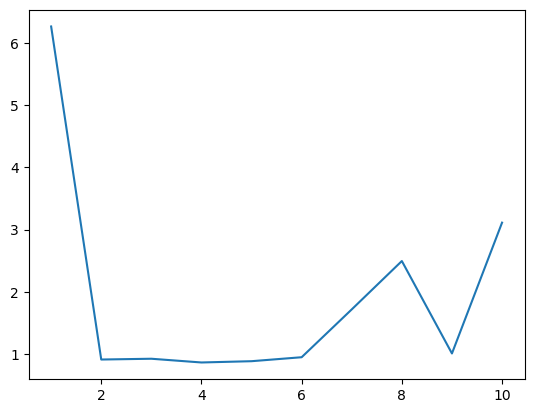

In [259]:
plt.plot(range(1,11), mses)

(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

&rarr; they are the same as the LOOCV always gives the same results 

(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

&rarr; the model with 2 degrees

(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

&rarr; 